In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Xopt class, TNK test function

This is the class method for running Xopt.

TNK function
$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [2]:
# Import the class
from xopt import Xopt

The `Xopt` object can be instantiated from a JSON or YAML file, or a dict, with the proper structure.

Here we will make one

In [3]:
import yaml
# Make a proper input file. 
YAML="""
xopt: {output_path: null, verbose: true}

algorithm:
  name: bayesian_exploration
  options: {n_initial_samples: 5,
            use_gpu: False,
            restart_data_file: results.json,
            n_steps: 20, 
            verbose: True}
  
simulation: 
  name: test_TNK
  evaluate: xopt.evaluators.test_TNK.evaluate_TNK  
  
vocs:
  name: TNK_test
  description: null
  simulation: test_TNK
  templates: null
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: None}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: ['LESS_THAN', 0.5]
  linked_variables: {x9: x1}
  constants: {a: dummy_constant}

"""
config = yaml.safe_load(YAML)

In [4]:
# Optional: Connect the function directly
#from xopt.evaluators.test_TNK import evaluate_TNK 
#config['simulation']['evaluate'] = evaluate_TNK 

X = Xopt(config)
X

Loading config as dict.



            Xopt 
________________________________           
Version: 0.4.3
Configured: True
Config as YAML:
xopt: {output_path: null, verbose: true}
algorithm:
  name: bayesian_exploration
  function: xopt.bayesian_exploration.bayesian_exploration
  options: {n_initial_samples: 5, use_gpu: false, restart_data_file: 'C:\Users\Ryan
      Roussel\Documents\GitHub\xopt\examples\bayes_exp\results.json', n_steps: 20,
    verbose: true}
simulation:
  name: test_TNK
  evaluate: xopt.evaluators.test_TNK.evaluate_TNK
  options: {extra_option: abc}
vocs:
  name: TNK_test
  description: null
  simulation: test_TNK
  templates: null
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: None}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: [LESS_THAN, 0.5]
  linked_variables: {x9: x1}
  constants: {a: dummy_constant}

In [5]:
# Note that the repr string contains all of the config information
X.random_evaluate()

{'y1': 2.5241294899979043,
 'y2': 2.096798126438952,
 'c1': 9.758271065644164,
 'c2': 6.646864448878123,
 'some_array': array([1, 2, 3])}

# Run CNSGA

CNSGA is designed to run in parallel with an asynchronous executor as defined in PEP 3148

In [6]:
# Pick one of these
from concurrent.futures import ThreadPoolExecutor as PoolExecutor
#from concurrent.futures import ProcessPoolExecutor as PoolExecutor

executor = PoolExecutor()
# This will also work. 
#executor=None

In [7]:
# Change max generations
X.run(executor=executor)

Starting at time 2021-08-06T15:47:07-05:00
No executor given. Running in serial mode.
tensor([[0.0668, 1.0440]], dtype=torch.float64)
tensor([[0.9095, 0.4908]], dtype=torch.float64)
tensor([[0.7232, 1.1498]], dtype=torch.float64)
tensor([[0.4350, 1.1824]], dtype=torch.float64)
tensor([[0.6028, 0.8360]], dtype=torch.float64)
tensor([[1.0447, 0.0713]], dtype=torch.float64)
tensor([[1.1795, 0.3632]], dtype=torch.float64)
tensor([[3.1416, 3.1416]], dtype=torch.float64)
tensor([[0.9429, 1.0334]], dtype=torch.float64)
tensor([[0.0605, 1.0401]], dtype=torch.float64)
tensor([[0.8839, 0.5275]], dtype=torch.float64)
tensor([[0.3097, 0.9957]], dtype=torch.float64)
tensor([[1.1374, 0.7777]], dtype=torch.float64)
tensor([[1.1795, 0.3477]], dtype=torch.float64)
tensor([[0.6485, 1.1776]], dtype=torch.float64)
tensor([[0.6439, 0.8088]], dtype=torch.float64)
tensor([[1.0415, 0.0636]], dtype=torch.float64)
tensor([[0.3213, 1.1666]], dtype=torch.float64)
tensor([[0.5598, 0.8249]], dtype=torch.float64)
te

# Plot

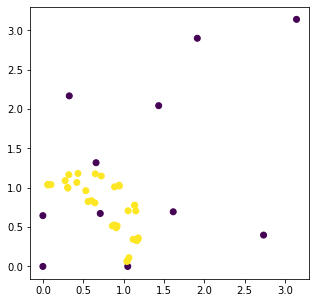

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

train_x = X.results['inputs']
feas = X.results['feasibility']
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(*train_x.T, c = feas.int())
